In [204]:
import numpy as py
import pandas as pd

In [205]:
df = pd.read_csv('Data/PublicationScoreBook.csv',encoding="latin-1")

In [206]:
df.head()

,Scopus SourceID,Title,CiteScore,Percentile,Citation Count,Scholarly Output,Percent Cited,SNIP,SJR,RANK,...,Publisher,Type,OpenAccess,Scopus ASJC Code (Sub-subject Area),Scopus Sub-Subject Area,Quartile,Top 10% (CiteScore Percentile),Scopus SourceID.1,Print-ISSN,E-ISSN
0,28773.0,Ca-A Cancer Journal for Clinicians,130.47,99.0,16961.0,130.0,70.0,88.164,61.786,1.0,...,Wiley-Blackwell,Journal,NO,2720.0,Hematology,Quartile 1,Top 10%,https://www.scopus.com/sourceid/28773,00079235,15424863
1,28773.0,Ca-A Cancer Journal for Clinicians,130.47,99.0,16961.0,130.0,70.0,88.164,61.786,1.0,...,Wiley-Blackwell,Journal,NO,2730.0,Oncology,Quartile 1,Top 10%,https://www.scopus.com/sourceid/28773,00079235,15424863
2,19434.0,MMWR. Recommendations and reports : Morbidity ...,63.12,99.0,1010.0,16.0,100.0,32.534,34.638,1.0,...,Centers for Disease Control and Prevention (CDC),Journal,YES,2713.0,Epidemiology,Quartile 1,Top 10%,https://www.scopus.com/sourceid/19434,10575987,15458601
3,19434.0,MMWR. Recommendations and reports : Morbidity ...,63.12,99.0,1010.0,16.0,100.0,32.534,34.638,1.0,...,Centers for Disease Control and Prevention (CDC),Journal,YES,3306.0,Health(social science),Quartile 1,Top 10%,https://www.scopus.com/sourceid/19434,10575987,15458601
4,19434.0,MMWR. Recommendations and reports : Morbidity ...,63.12,99.0,1010.0,16.0,100.0,32.534,34.638,1.0,...,Centers for Disease Control and Prevention (CDC),Journal,YES,2307.0,"Health, Toxicology and Mutagenesis",Quartile 1,Top 10%,https://www.scopus.com/sourceid/19434,10575987,15458601


In [207]:
df.shape

(50187, 21)

In [208]:
df.isna().sum()

Scopus SourceID                            5
Title                                      5
CiteScore                                  5
Percentile                                 5
Citation Count                             5
Scholarly Output                           5
Percent Cited                              5
SNIP                                       5
SJR                                        5
RANK                                       5
Rank Out Of                                5
Publisher                                293
Type                                       5
OpenAccess                                 5
Scopus ASJC Code (Sub-subject Area)        5
Scopus Sub-Subject Area                    5
Quartile                                   5
Top 10% (CiteScore Percentile)         45146
Scopus SourceID.1                          5
Print-ISSN                              2146
E-ISSN                                 28061
dtype: int64

In [209]:
df=df.dropna()

In [210]:
df.isna().sum()

Scopus SourceID                        0
Title                                  0
CiteScore                              0
Percentile                             0
Citation Count                         0
Scholarly Output                       0
Percent Cited                          0
SNIP                                   0
SJR                                    0
RANK                                   0
Rank Out Of                            0
Publisher                              0
Type                                   0
OpenAccess                             0
Scopus ASJC Code (Sub-subject Area)    0
Scopus Sub-Subject Area                0
Quartile                               0
Top 10% (CiteScore Percentile)         0
Scopus SourceID.1                      0
Print-ISSN                             0
E-ISSN                                 0
dtype: int64

In [211]:
df["Scopus ASJC Code (Sub-subject Area)"] = df["Scopus ASJC Code (Sub-subject Area)"].astype(str)
df["Scopus SourceID"] = df["Scopus SourceID"].astype(str)

In [212]:
df.dtypes

Scopus SourceID                         object
Title                                   object
CiteScore                              float64
Percentile                             float64
Citation Count                         float64
Scholarly Output                       float64
Percent Cited                          float64
SNIP                                    object
SJR                                     object
RANK                                   float64
Rank Out Of                            float64
Publisher                               object
Type                                    object
OpenAccess                              object
Scopus ASJC Code (Sub-subject Area)     object
Scopus Sub-Subject Area                 object
Quartile                                object
Top 10% (CiteScore Percentile)          object
Scopus SourceID.1                       object
Print-ISSN                              object
E-ISSN                                  object
dtype: object

In [214]:
len(df["Scopus Sub-Subject Area"].unique())

281

In [215]:
len(df["Title"].unique())

1231

In [216]:
df_asjc = pd.read_csv('Data/CodePublicationMatching.txt',sep='\t',encoding="latin-1")

In [217]:
df_asjc.head()

,ASJC Code,Description,Unnamed: 2,ASJC = All Science Journal Classification
0,10,Multidisciplinary,NaN,NaN
1,1000,Multidisciplinary,NaN,NaN
2,11,Agricultural and Biological Sciences,NaN,NaN
3,1100,General Agricultural and Biological Sciences,NaN,NaN
4,1101,Agricultural and Biological Sciences (miscella...,NaN,NaN


In [218]:
df_asjc = df_asjc.drop("Unnamed: 2",axis = 1)

In [219]:
df_asjc = df_asjc.drop("ASJC = All Science Journal Classification",axis = 1)

In [220]:
df_asjc.head()

,ASJC Code,Description
0,10,Multidisciplinary
1,1000,Multidisciplinary
2,11,Agricultural and Biological Sciences
3,1100,General Agricultural and Biological Sciences
4,1101,Agricultural and Biological Sciences (miscella...


In [221]:
df_subject = df_asjc[df_asjc["ASJC Code"].isin(range(10,40))]

In [222]:
df_subject

,ASJC Code,Description
0,10,Multidisciplinary
2,11,Agricultural and Biological Sciences
15,12,Arts and Humanities
30,13,"Biochemistry, Genetics and Molecular Biology"
47,14,"Business, Management and Accounting"
59,15,Chemical Engineering
69,16,Chemistry
78,17,Computer Science
92,18,Decision Sciences
98,19,Earth and Planetary Sciences


In [223]:
di = df_subject.set_index('ASJC Code').to_dict()["Description"]

In [224]:
di

{10: 'Multidisciplinary',
 11: 'Agricultural and Biological Sciences',
 12: 'Arts and Humanities',
 13: 'Biochemistry, Genetics and Molecular Biology',
 14: 'Business, Management and Accounting',
 15: 'Chemical Engineering',
 16: 'Chemistry',
 17: 'Computer Science',
 18: 'Decision Sciences',
 19: 'Earth and Planetary Sciences',
 20: 'Economics, Econometrics and Finance',
 21: 'Energy',
 22: 'Engineering',
 23: 'Environmental Science',
 24: 'Immunology and Microbiology',
 25: 'Materials Science',
 26: 'Mathematics',
 27: 'Medicine',
 28: 'Neuroscience',
 29: 'Nursing',
 30: 'Pharmacology, Toxicology and Pharmaceutics',
 31: 'Physics and Astronomy',
 32: 'Psychology',
 33: 'Social Sciences',
 34: 'Veterinary',
 35: 'Dentistry',
 36: 'Health Professions'}

In [225]:
def append_subject_area(row):
    ssa = row["Scopus ASJC Code (Sub-subject Area)"]
#     print(ssa)
    ssa = ssa[0:2]
    return di[int(ssa)]

In [226]:
df["Subject Area"] = df.apply(lambda row:append_subject_area(row),axis = 1)

In [227]:
df.dtypes

Scopus SourceID                         object
Title                                   object
CiteScore                              float64
Percentile                             float64
Citation Count                         float64
Scholarly Output                       float64
Percent Cited                          float64
SNIP                                    object
SJR                                     object
RANK                                   float64
Rank Out Of                            float64
Publisher                               object
Type                                    object
OpenAccess                              object
Scopus ASJC Code (Sub-subject Area)     object
Scopus Sub-Subject Area                 object
Quartile                                object
Top 10% (CiteScore Percentile)          object
Scopus SourceID.1                       object
Print-ISSN                              object
E-ISSN                                  object
Subject Area 

In [228]:
df.head(5)

,Scopus SourceID,Title,CiteScore,Percentile,Citation Count,Scholarly Output,Percent Cited,SNIP,SJR,RANK,...,Type,OpenAccess,Scopus ASJC Code (Sub-subject Area),Scopus Sub-Subject Area,Quartile,Top 10% (CiteScore Percentile),Scopus SourceID.1,Print-ISSN,E-ISSN,Subject Area
0,28773.0,Ca-A Cancer Journal for Clinicians,130.47,99.0,16961.0,130.0,70.0,88.164,61.786,1.0,...,Journal,NO,2720.0,Hematology,Quartile 1,Top 10%,https://www.scopus.com/sourceid/28773,00079235,15424863,Medicine
1,28773.0,Ca-A Cancer Journal for Clinicians,130.47,99.0,16961.0,130.0,70.0,88.164,61.786,1.0,...,Journal,NO,2730.0,Oncology,Quartile 1,Top 10%,https://www.scopus.com/sourceid/28773,00079235,15424863,Medicine
2,19434.0,MMWR. Recommendations and reports : Morbidity ...,63.12,99.0,1010.0,16.0,100.0,32.534,34.638,1.0,...,Journal,YES,2713.0,Epidemiology,Quartile 1,Top 10%,https://www.scopus.com/sourceid/19434,10575987,15458601,Medicine
3,19434.0,MMWR. Recommendations and reports : Morbidity ...,63.12,99.0,1010.0,16.0,100.0,32.534,34.638,1.0,...,Journal,YES,3306.0,Health(social science),Quartile 1,Top 10%,https://www.scopus.com/sourceid/19434,10575987,15458601,Social Sciences
4,19434.0,MMWR. Recommendations and reports : Morbidity ...,63.12,99.0,1010.0,16.0,100.0,32.534,34.638,1.0,...,Journal,YES,2307.0,"Health, Toxicology and Mutagenesis",Quartile 1,Top 10%,https://www.scopus.com/sourceid/19434,10575987,15458601,Environmental Science


In [229]:
df.isna().sum()

Scopus SourceID                        0
Title                                  0
CiteScore                              0
Percentile                             0
Citation Count                         0
Scholarly Output                       0
Percent Cited                          0
SNIP                                   0
SJR                                    0
RANK                                   0
Rank Out Of                            0
Publisher                              0
Type                                   0
OpenAccess                             0
Scopus ASJC Code (Sub-subject Area)    0
Scopus Sub-Subject Area                0
Quartile                               0
Top 10% (CiteScore Percentile)         0
Scopus SourceID.1                      0
Print-ISSN                             0
E-ISSN                                 0
Subject Area                           0
dtype: int64

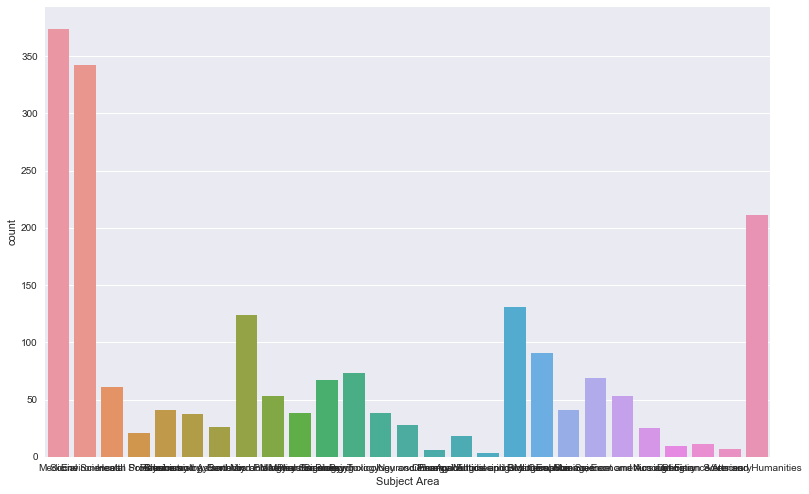

In [234]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8.27)})
sns.set(style="darkgrid")
ax = sns.countplot(x="Subject Area", data=df)

In [236]:
df.to_csv("ProcessedScopusData.csv")